In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)

In [35]:
data = pd.read_csv("https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD")

In [68]:
data.shape

(6390, 12)

In [69]:
data.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 599.2+ KB


In [71]:
data.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,5484.000000
mean,1.872926,4.621909,4.686775,1997.525822,22.692019,2.712207,13.709810
std,0.333081,2.031777,1.829624,14.937451,12.286033,1.932280,11.531805
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.230000,1988.000000,12.000000,0.000000,5.000000
50%,2.000000,5.000000,5.125100,1999.000000,23.000000,3.000000,10.500000
75%,2.000000,6.000000,6.153000,2009.000000,33.000000,4.100000,19.500000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000


In [106]:
df = data.copy()

In [73]:
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3


In [75]:
neumerical_feature = [feature for feature in df.columns if df[feature].dtype != "O"]

In [76]:
neumerical_feature

['UNIT_NUM',
 'STUB_NAME_NUM',
 'STUB_LABEL_NUM',
 'YEAR',
 'YEAR_NUM',
 'AGE_NUM',
 'ESTIMATE']

In [83]:
def visualise_relationship(feature):
  sns.scatterplot(x = df[feature],y = df['ESTIMATE'])
  plt.xlabel(feature)
  plt.ylabel("estimate")
  plt.show()

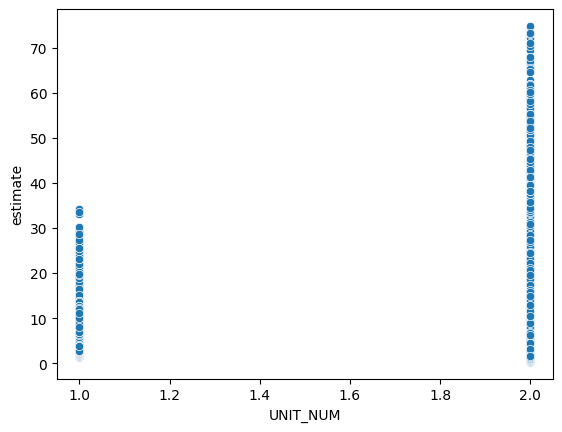

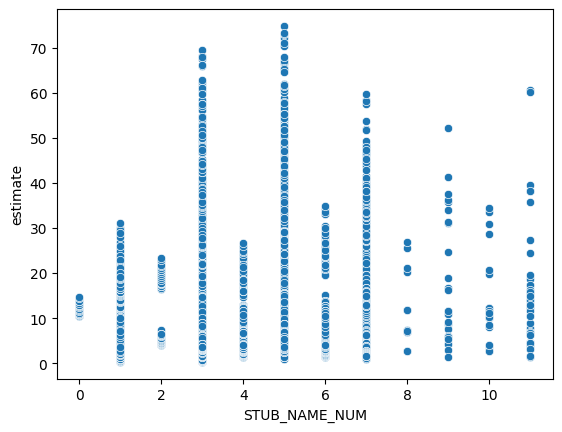

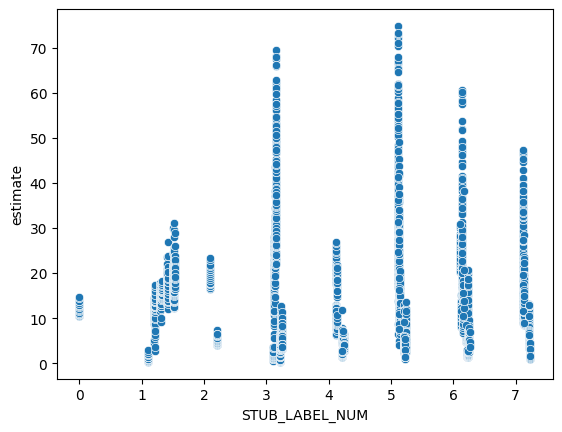

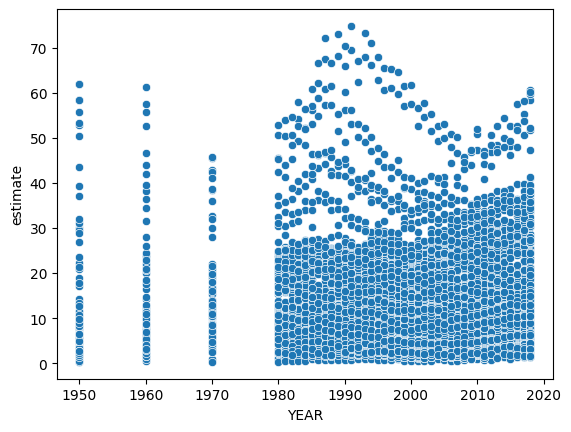

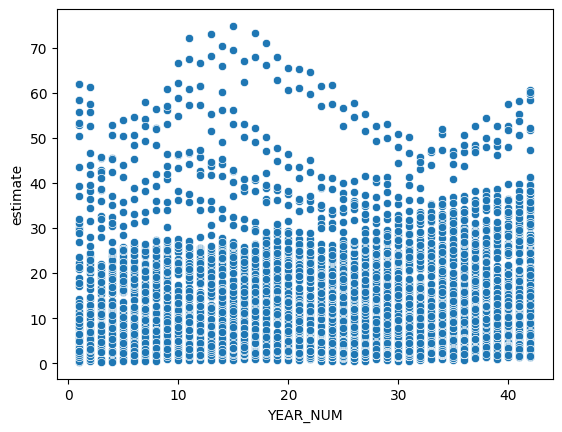

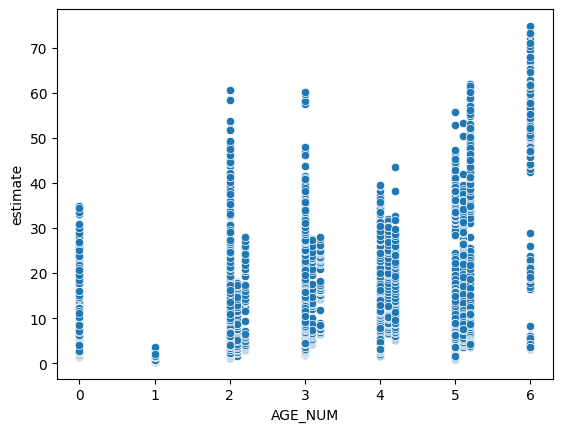

In [84]:
for feature in neumerical_feature:
  if feature != "ESTIMATE":
    visualise_relationship(feature)

In [85]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

In [86]:
categorical_feature

['INDICATOR', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'AGE']

In [89]:
def visualise_categorical_feature(feature):
  if feature != "INDICATOR":
    sns.barplot(x = df[feature],y=df["ESTIMATE"])
    plt.xlabel(feature)
    plt.ylabel("estimate")
    plt.show()

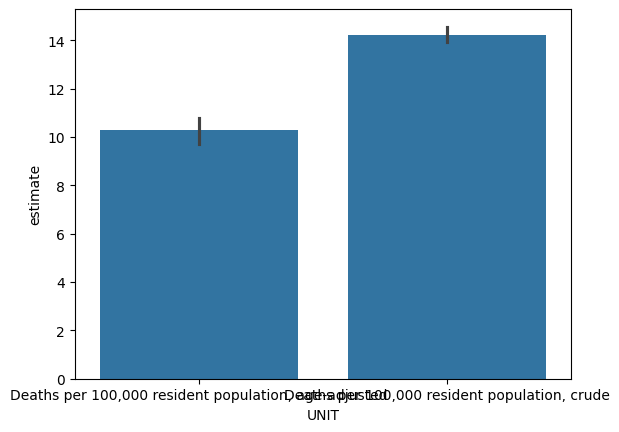

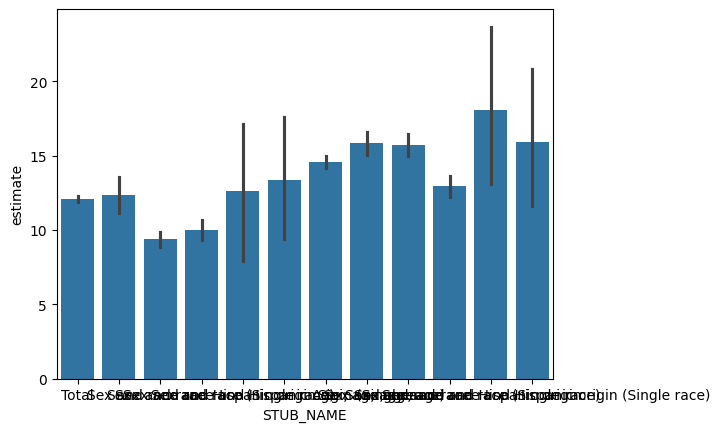

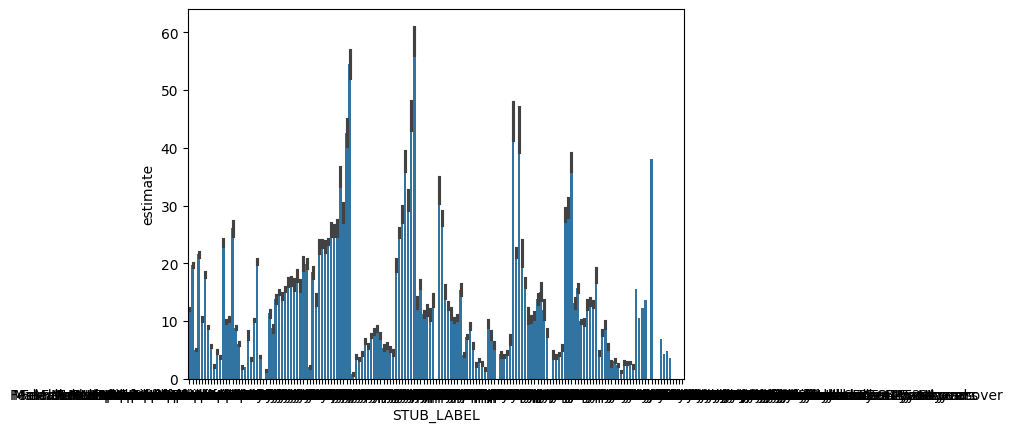

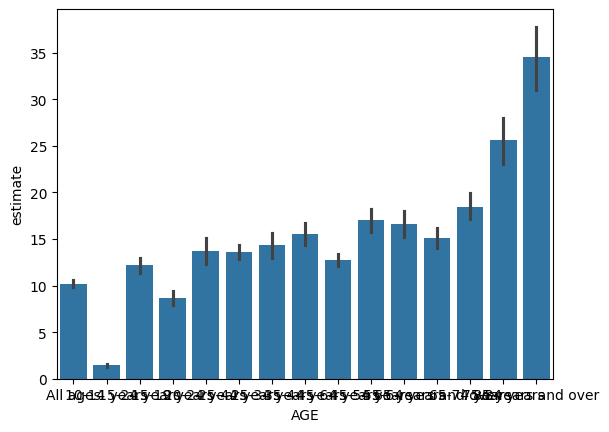

In [90]:
for feature in categorical_feature:
  visualise_categorical_feature(feature)

In [91]:
for feature in neumerical_feature:
  print(feature ,":- ", df[feature].isnull().sum())

UNIT_NUM :-  0
STUB_NAME_NUM :-  0
STUB_LABEL_NUM :-  0
YEAR :-  0
YEAR_NUM :-  0
AGE_NUM :-  0
ESTIMATE :-  906


In [92]:
df.loc[0]

INDICATOR                                   Death rates for suicide
UNIT              Deaths per 100,000 resident population, age-ad...
UNIT_NUM                                                          1
STUB_NAME                                                     Total
STUB_NAME_NUM                                                     0
STUB_LABEL                                              All persons
STUB_LABEL_NUM                                                  0.0
YEAR                                                           1950
YEAR_NUM                                                          1
AGE                                                        All ages
AGE_NUM                                                         0.0
ESTIMATE                                                       13.2
Name: 0, dtype: object

from the above information we can conclude that the missing values of estimate column are MCAR so we have to use the measure of central tendancy to fill the missing values.

<ipython-input-107-dd1d1f587fed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ESTIMATE"],kde=True,hist = False)


<Axes: xlabel='ESTIMATE', ylabel='Density'>

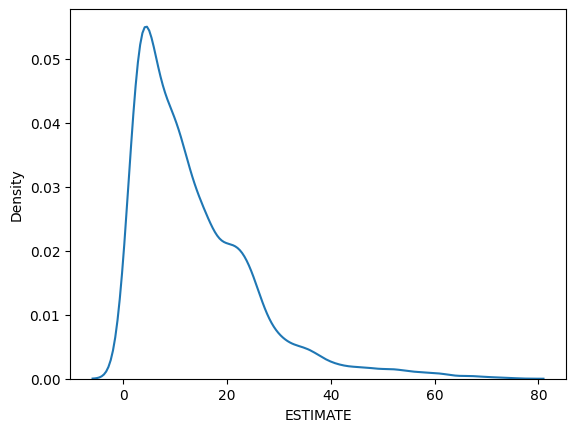

In [107]:
sns.distplot(df["ESTIMATE"],kde=True,hist = False)

<Axes: ylabel='ESTIMATE'>

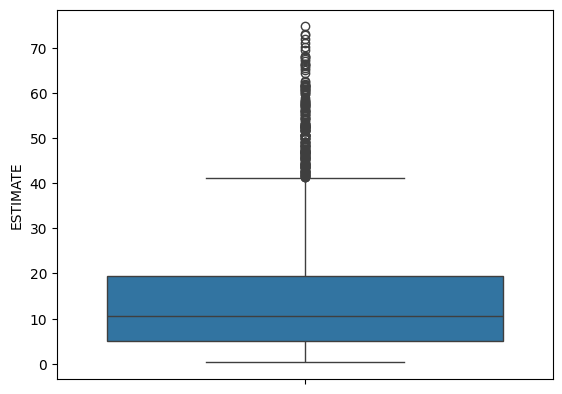

In [108]:
sns.boxplot(y=df["ESTIMATE"])

as we can see there is outliers into the data so to replace the missing values we have to use the madian().

In [109]:
median = df["ESTIMATE"].median()
median

10.5

In [110]:
df["ESTIMATE"].fillna(median,inplace=True)

In [111]:
for feature in df.columns:
  print(feature ,":- ", df[feature].isnull().sum())

INDICATOR :-  0
UNIT :-  0
UNIT_NUM :-  0
STUB_NAME :-  0
STUB_NAME_NUM :-  0
STUB_LABEL :-  0
STUB_LABEL_NUM :-  0
YEAR :-  0
YEAR_NUM :-  0
AGE :-  0
AGE_NUM :-  0
ESTIMATE :-  0


<ipython-input-112-dd1d1f587fed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ESTIMATE"],kde=True,hist = False)


<Axes: xlabel='ESTIMATE', ylabel='Density'>

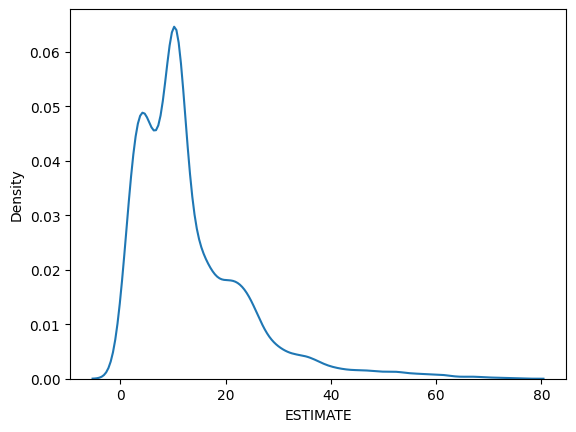

In [112]:
sns.distplot(df["ESTIMATE"],kde=True,hist = False)

In [113]:
for feature in df.columns:
  print(feature ,":- ", df[feature].isnull().sum())

INDICATOR :-  0
UNIT :-  0
UNIT_NUM :-  0
STUB_NAME :-  0
STUB_NAME_NUM :-  0
STUB_LABEL :-  0
STUB_LABEL_NUM :-  0
YEAR :-  0
YEAR_NUM :-  0
AGE :-  0
AGE_NUM :-  0
ESTIMATE :-  0


<Axes: xlabel='UNIT', ylabel='count'>

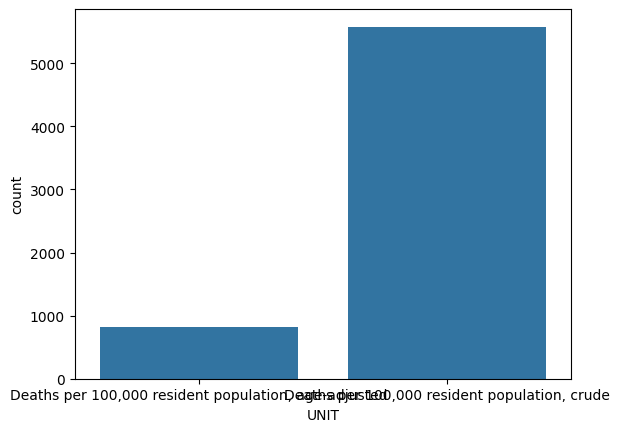

In [117]:
sns.countplot(data=df,x="UNIT")

from the above observations we can conclude that the data is imbalance .